In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import tensorflow.keras as keras

In [ ]:
model_velocity = keras.models.load_model('saved_model_velocity')
model_regression = keras.models.load_model('saved_mode_regression')
model_categorical = keras.models.load_model('saved_model_categorical_right_align')

In [ ]:
from audio_process.fft import stfft, normalizer, get_highest_rows, cut_fft_image, fit_image_length, expand_image_dims

In [ ]:
def train_img_generate(signal, jump=64):
    spectrum_normalized, columns = stfft(signal.astype(np.float32), int(jump), normalizer)
    highest_rows = get_highest_rows(spectrum_normalized) 
    image_cut = cut_fft_image(spectrum_normalized, highest_rows)
    image_fitted = fit_image_length(image_cut)
    return image_fitted

In [45]:
ORIG_AUDIO_FILE_NAME = 'training_data/AUDIO17/AUDIO_012_222/AHEA_15000_17_022.wav'
ORIG_AUDIO_FILE_NAME_2 = 'training_data/AUDIO17/AUDIO_012_222/AGVDNY_25300_17_222.wav'
ORIG_AUDIO_FILE_NAME_3 = 'training_data/MorseTrainSet_18/AUDIO18/ZSSBPFNEU_11400_18_411/CZVEJZX_24600_18_402.wav'
ORIG_AUDIO_FILE_NAME_4 = 'training_data/MorseTrainSet_18/AUDIO18/ZSSBPFNEU_11400_18_411/BIZMRR_27000_18_402.wav'

SampleRate, signal = wavfile.read(ORIG_AUDIO_FILE_NAME)

length = signal.shape[0] / SampleRate
print('length:', length, "seconds")

length: 1.2296666666666667 seconds


In [46]:

def show_image(img, width=300):
    plt.figure(figsize=(30,5))
    plt.xlim(0, width)
    plt.imshow(img)
    plt.show()

In [47]:
img = train_img_generate(signal, 64)

velocity_prediction = (model_velocity(expand_image_dims(img))).numpy()[0][0] * 100
velocity_prediction

36.59611940383911

In [48]:
rescale_jump = 64 * (21.5 / velocity_prediction)
img_rescaled = train_img_generate(signal, rescale_jump)

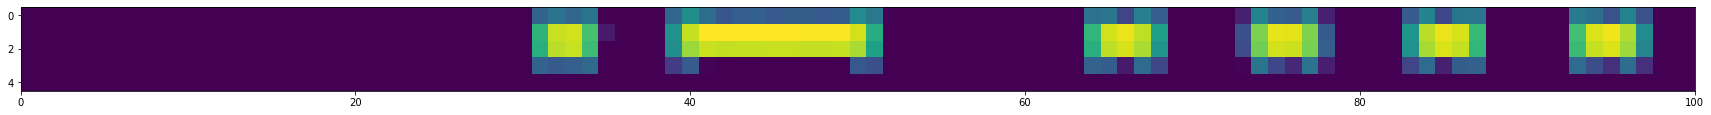

In [49]:
position = model_regression(expand_image_dims(img_rescaled)).numpy()[0][0] * 1400
show_image(img_rescaled, 100)
position = position +  5

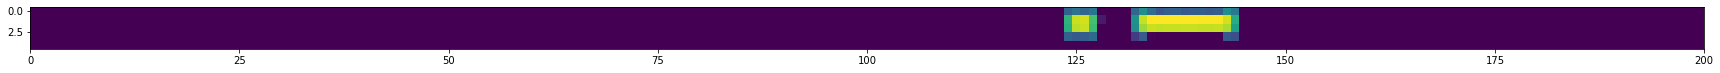

categorical prediction:  0


In [50]:
categorical_image = np.zeros((5, 1400))
n = (150 - position)
categorical_image[:, int(n):int(position) + int(n)] = img_rescaled[:,:int(position)]
categorical_prediction = model_categorical(expand_image_dims(categorical_image))

show_image(categorical_image, 200)
print('categorical prediction: ', np.argmax(categorical_prediction))